In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/My Drive/Colab Notebooks/Indian.xlsx")

In [ ]:
df.head()

,Company Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,...,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,2467.40,34.186904,7.793277,3.957021,9.725370,17.720494,...,49128.00,55461.00,74.653049,103222.00,212382.00,579376.00,169843.00,799432.00,-79652.00,26185.00
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.740680,25.932382,19.383065,29.072528,...,32430.00,43760.00,87.043624,48462.00,213.00,86063.00,38489.00,87108.00,35727.00,38802.00
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.435200,1.883433,20.420916,28.206116,...,31833.20,42796.14,57.899268,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.417895,18.847214,28.656802,...,19351.00,26628.00,45.607423,30090.00,11863.00,73627.00,27056.00,76782.00,21117.00,23224.00
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.382897,1.243333,11.395012,11.900543,...,18384.31,26028.33,27.461218,27368.40,536578.62,107231.52,147570.54,167175.84,136327.09,138015.30


In [ ]:
#I. Compare the growth rates of companies in different sub-sectors
growth_rates = df.groupby('Sub-Sector')['5Y Historical Revenue Growth'].mean()
print("Average growth rates by sub-sector:\n", growth_rates)

Average growth rates by sub-sector:
 Sub-Sector
0                                 -7.416337
Advertising                       33.066902
Aerospace & Defense Equipments     3.188788
Agricultural & Farm Machinery      1.042068
Agro Products                     19.168232
                                    ...    
Trucks & Buses                    -7.163228
Two Wheelers                      -1.615691
Water Management                   4.324622
Wellness Services                  5.610315
Wood Products                      1.566410
Name: 5Y Historical Revenue Growth, Length: 137, dtype: float64


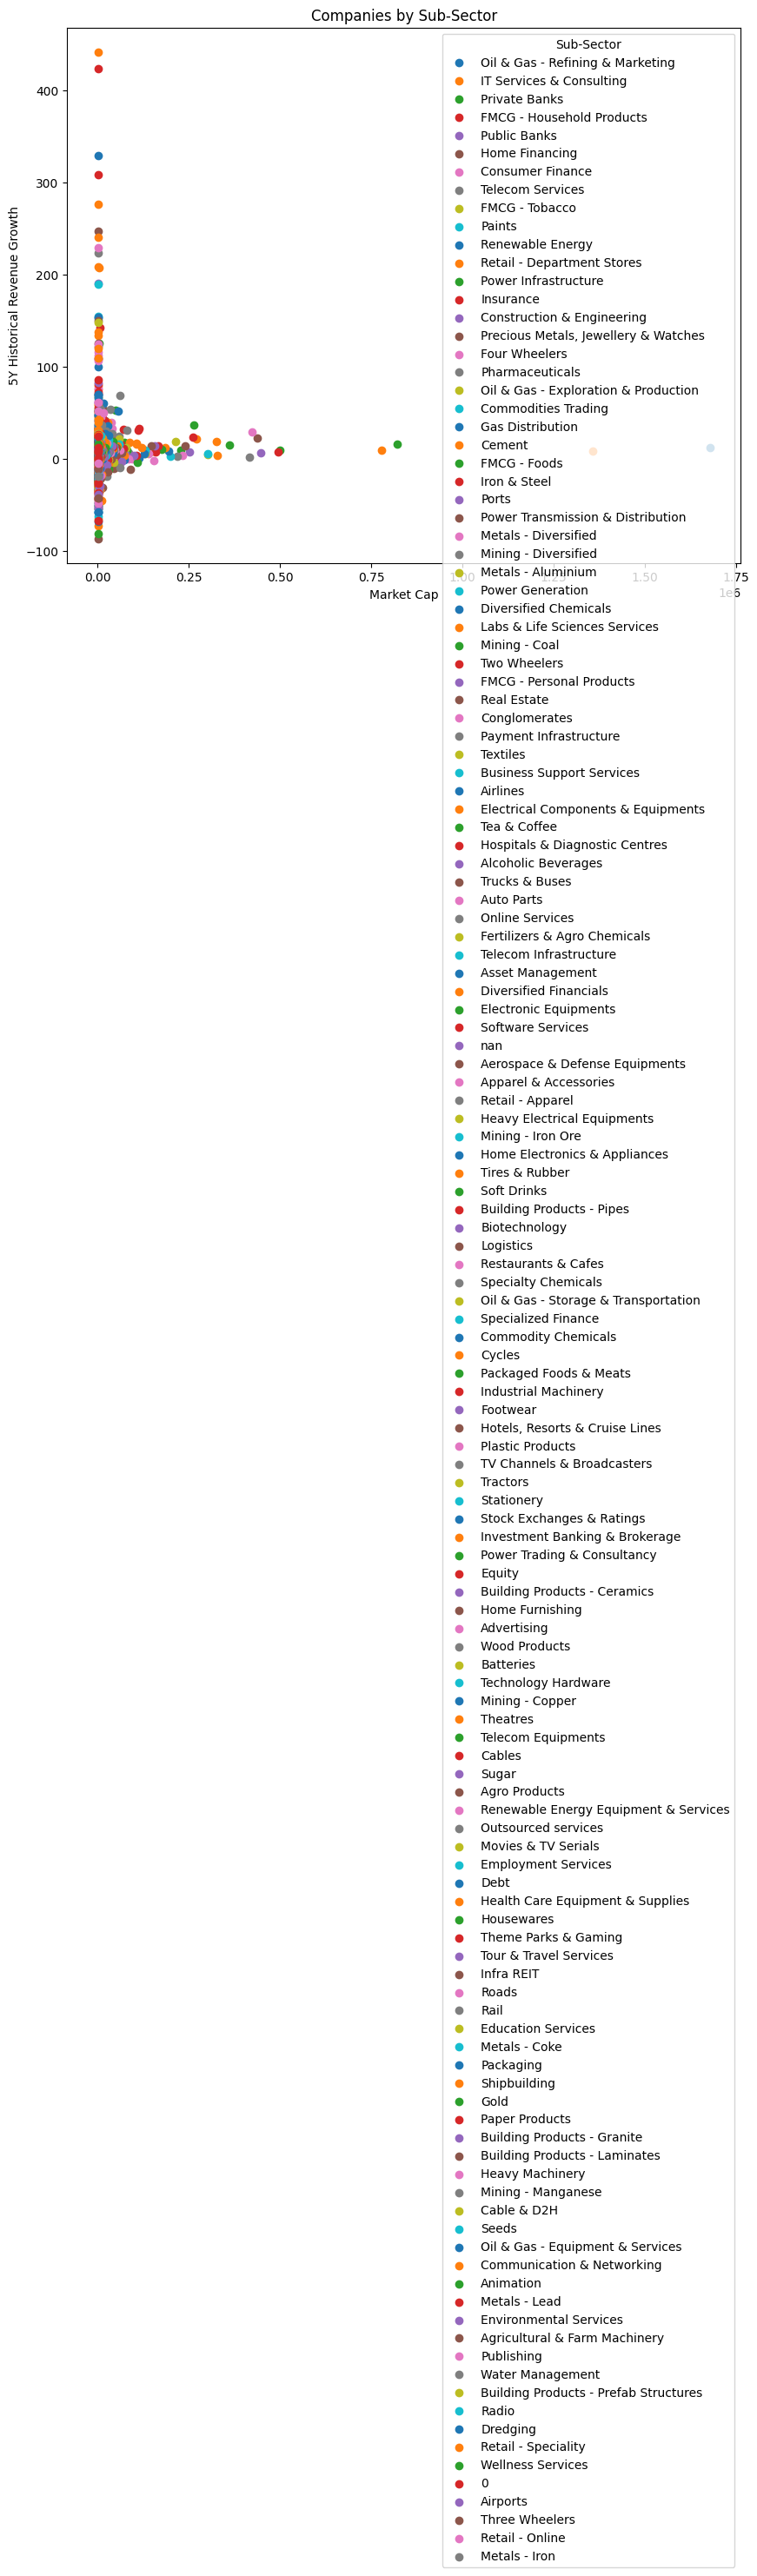

In [ ]:
#II. Screen the companies and visualize them according to sub-sectors
# Visualize companies by sub-sector
plt.figure(figsize=(10,8))
for sub_sector in df['Sub-Sector'].unique():
  subsector_data = df[df['Sub-Sector']==sub_sector]
  plt.scatter(subsector_data['Market Cap'], subsector_data['5Y Historical Revenue Growth'],label=sub_sector)
plt.title('Companies by Sub-Sector')
plt.xlabel('Market Cap')
plt.ylabel('5Y Historical Revenue Growth')
plt.legend(title='Sub-Sector')
plt.show()

In [ ]:
#III. Visualize the companies by segregating them according to Market Cap in three categories: Large Cap, Mid Cap & Small Cap
# Categorize companies by Market Cap
large_cap = df[df['Market Cap'] >= 10000]
mid_cap = df[(df['Market Cap'] > 5000)]
small_cap = df[df['Market Cap'] < 5000]

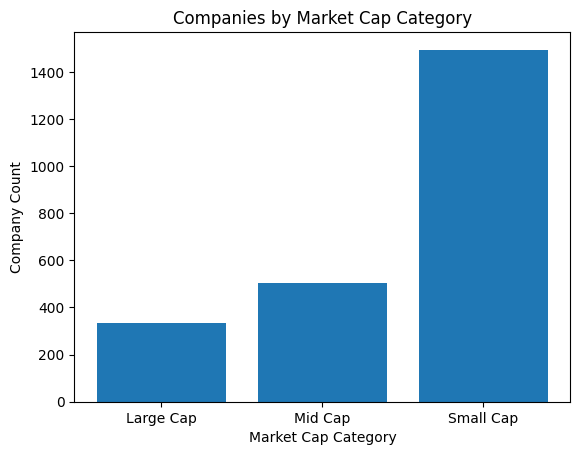

In [ ]:
# Visualize companies by Market Cap categories
market_cap_categories = ['Large Cap', 'Mid Cap', 'Small Cap']
counts = [len(large_cap), len(mid_cap), len(small_cap)]
plt.bar(market_cap_categories, counts)
plt.xlabel('Market Cap Category')
plt.ylabel('Company Count')
plt.title('Companies by Market Cap Category')
plt.show()

In [ ]:
# Find the intrinsic value of the company based on 3 cases of growth: Good, Bad, and Best
def f(row):
  if row['5Y Historical EBITDA Growth'] < -5:
      val= 'Bad'
  elif row['5Y Historical EBITDA Growth'] > -5 and row['5Y Historical EBITDA Growth'] < 25:
      val= 'Good'
  elif row['5Y Historical EBITDA Growth'] > 25:
      val= 'Best'
  else:
    val = 'NA'
  return val
df['Growth']=df.apply(f,axis=1)
df.head()

,Company Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,...,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow,Growth
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,2467.40,34.186904,7.793277,3.957021,9.725370,17.720494,...,55461.00,74.653049,103222.00,212382.00,579376.00,169843.00,799432.00,-79652.00,26185.00,Good
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.740680,25.932382,19.383065,29.072528,...,43760.00,87.043624,48462.00,213.00,86063.00,38489.00,87108.00,35727.00,38802.00,Good
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.435200,1.883433,20.420916,28.206116,...,42796.14,57.899268,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46,Good
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.417895,18.847214,28.656802,...,26628.00,45.607423,30090.00,11863.00,73627.00,27056.00,76782.00,21117.00,23224.00,Good
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.382897,1.243333,11.395012,11.900543,...,26028.33,27.461218,27368.40,536578.62,107231.52,147570.54,167175.84,136327.09,138015.30,Good


In [ ]:
import plotly.express as px
random_data= df.sample(n=10,axis=0)
random_data
random_data_sliced= random_data[['Company Name','Market Cap','Growth']]
random_data_sliced
px.line(random_data_sliced,x='Company Name',y='Growth',labels={'x':'Company Name','y':'Growth'},title='Performance')

In [ ]:
metric='Net Profit Margin'
avg_metric = df.groupby('Company Name')[metric].mean().sort_values(ascending=False)
print(avg_metric)
high_performance_metric= avg_metric.head()
Low_performance_metric= avg_metric.tail()
print(f"Companies with consistentely high {metric}")

Company Name
Hexa Tradex Ltd                  2443.589744
Alembic Ltd                       409.165772
Sundaram Finance Holdings Ltd     114.898911
V L S Finance Ltd                  99.166592
Vardhman Holdings Ltd              95.586716
                                    ...     
SBI Nifty Bank ETF                       NaN
Tayo Rolls Ltd                           NaN
UTI Gold ETF                             NaN
UTI Nifty Next 50 ETF                    NaN
UTI Sensex 30 ETF                        NaN
Name: Net Profit Margin, Length: 1996, dtype: float64
Companies with consistentely high Net Profit Margin
